In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
from datetime import date
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [91]:
data = pd.read_csv(r"C:\Users\amani\Downloads\HDFC.csv")

In [92]:
data.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.5,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.0,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.9,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [94]:
data["Date"] = pd.to_datetime(data["Date"])

In [95]:
data.Series.value_counts()

EQ    5306
Name: Series, dtype: int64

In [96]:
data.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.5,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.0,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.9,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN


In [97]:
# as forecasting depends on time and open value, we will take that into consideration

data1 = data[["Date","Open"]]

In [98]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5306 non-null   datetime64[ns]
 1   Open    5306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 83.0 KB


In [99]:
data1.isnull().sum()

Date    0
Open    0
dtype: int64

In [100]:
data1.head(3)

,Date,Open
0,2000-01-03,293.5
1,2000-01-04,317.0
2,2000-01-05,290.0


In [101]:
data1["Date"].min(),data1["Date"].max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2021-04-30 00:00:00'))

In [102]:
data1.shape

(5306, 2)

In [103]:
data1.columns

Index(['Date', 'Open'], dtype='object')

In [104]:
data1 = data1.set_index(["Date"])

In [105]:
data1.head()

,Open
Date,
2000-01-03,293.5
2000-01-04,317.0
2000-01-05,290.0
2000-01-06,301.0
2000-01-07,290.0


# To check and proof that data is not stationary

### First Approach-Rolling Window

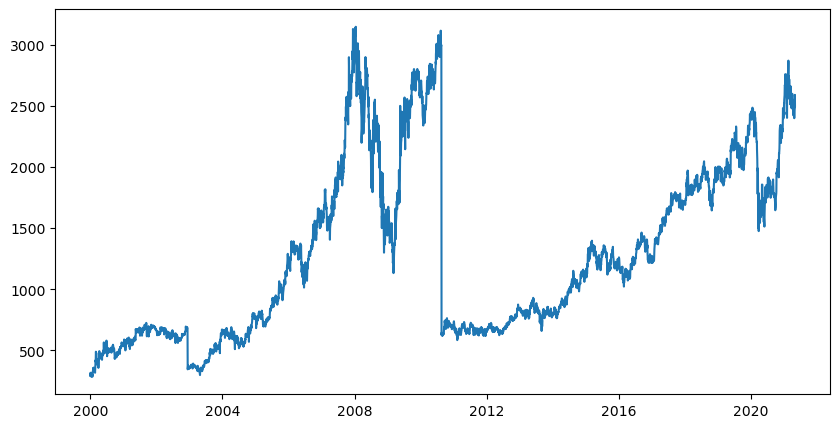

In [163]:
plt.plot(data1)

In [164]:
#rolling is used to make trend stationary so that time series process can be applied

rolling_mean = data1.rolling(window = 500).mean()
rolling_std = data1.rolling(window = 500).std()

In [165]:
rolling_mean.isnull().sum()

Open    499
dtype: int64

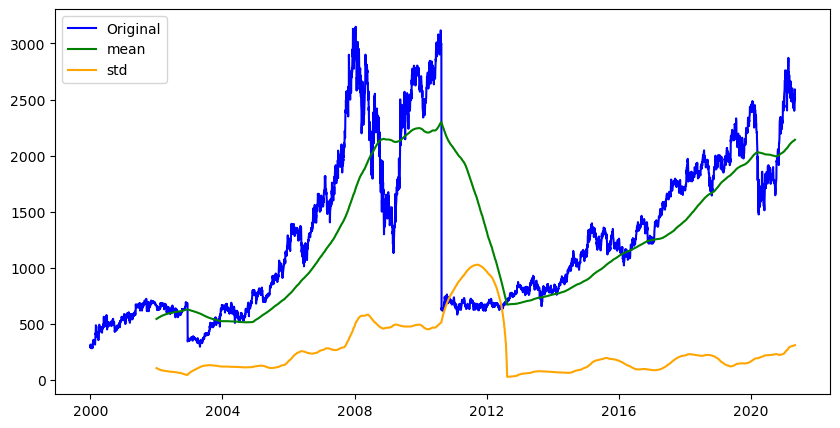

In [179]:
# plotting original and rolling data together to check for stationary

plt.plot(data1,color='blue',label="Original")
plt.plot(rolling_mean,color='green',label="mean")
plt.plot(rolling_std,color='orange',label="std")
plt.legend(loc = 'best')

It can be visible that original data is not stationary